In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def getParameters(x):
    if x.ndim==1:
        w=0
        b=0
        return w,b
    elif x.ndim==2:
        m=x.shape[1]
        w=np.zeros(m)
        b=0
        return w,b

In [3]:
def Regression(x,w,b):
    m=x.shape[0]
    f_wb=np.zeros(m)
    
    if x.ndim==1:
        for i in range (m):
            f_wb[i]=(w*x[i])+b
        return f_wb
    
    elif x.ndim==2:
        for i in range (m):
            f_wb[i]=np.dot(w,x[i])+b
        return f_wb

In [4]:
def Sigmoid(z):
    z=(1/(1+np.exp(-z)))
    return z

In [5]:
def Cost(y,f_wb):
    cost=0
    C=[]
    m=y.shape[0]
    for i in range (m):
        diff=(y[i]*(np.log(f_wb[i]))+(1-y[i])*(np.log(1-f_wb[i])))
        cost=cost+diff
        C.append(diff)
    cost=(-cost)/m
    return cost,C

In [6]:
def min_max_normalization(data):
    max=np.max(data,axis=0)
    min=np.min(data,axis=0)
    normalised_data=(data-min)/(max-min)
    return normalised_data,max,min

In [7]:
def denormalize(normalised_data,max,min):
    data=((normalised_data*(max-min))+min)
    return data

In [8]:
def Gradient_Descent(x,y,f_wb,alpha,w,b):
    if x.ndim==1:
        m=x.shape[0]
        shift_w=0
        shift_b=0
        for i in range (m):
            shift_b=shift_b+(f_wb[i]-y[i])
            shift_w=shift_w+((f_wb[i]-y[i])*x[i])
        shift_b=(alpha*shift_b)/m
        shift_w=(alpha*shift_w)/m
        b=b-shift_b
        w=w-shift_w
        return w,b
    elif x.ndim==2:
        m=x.shape[0] #number of examples
        n=x.shape[1] #number of features
        shift_b=0
        shift_w=np.zeros(n)
        for i in range (m):
            shift_b=shift_b+(f_wb[i]-y[i])
            for j in range (n):
                shift_w[j]=shift_w[j]+((f_wb[i]-y[i])*x[i,j])
        shift_b=(alpha*shift_b)/m
        shift_w=(alpha*shift_w)/m
        b=b-shift_b
        w=w-shift_w
        return w,b

In [9]:
def Decision_Boundary(f_wb,limit):
    m=f_wb.shape[0]
    for i in range(m):
        if f_wb[i]>limit:
            f_wb[i]=1
        else:
            f_wb[i]=0
    return f_wb

In [10]:
def Accuracy(y,f_wb):
    accuracy=0
    m=y.shape[0]
    for i in range(m):
        if f_wb[i]==y[i]:
            accuracy+=1
    accuracy=(accuracy*100)/m
    return accuracy

In [11]:
def Confusion_Matrix(y,prediction):
    tp=0
    tn=0
    fp=0
    fn=0
    for i in range (len(prediction)):
        if prediction[i]==0 and y[i]==0:
            tn=tn+1
        elif prediction[i]==0 and y[i]==1:
            fn+=1
        elif prediction[i]==1 and y[i]==0:
            fp+=1
        elif prediction[i]==1 and y[i]==1:
            tp+=1
    print(tp,fp,"\n",fn,tn)
    return

In [12]:
email_df=pd.read_csv(r"C:\Users\yashr\OneDrive\Desktop\Mini-Projects\IDA Mini-Project\spambase\spambase.data",header=None)

In [13]:
email_df.columns=['word_freq_make', 'word_freq_address',  'word_freq_all', 'word_freq_3d', 'word_freq_our', 'word_freq_over', 'word_freq_remove', 'word_freq_internet', 'word_freq_order', 'word_freq_mail', 'word_freq_receive', 'word_freq_will', 'word_freq_people', 'word_freq_report', 'word_freq_addresses', 'word_freq_free', 'word_freq_business', 'word_freq_email', 'word_freq_you', 'word_freq_credit', 'word_freq_your', 'word_freq_font', 'word_freq_000', 'word_freq_money', 'word_freq_hp', 'word_freq_hpl',  'word_freq_george', 'word_freq_650', 'word_freq_lab', 'word_freq_labs', 'word_freq_telnet', 'word_freq_857', 'word_freq_data', 'word_freq_415', 'word_freq_85', 'word_freq_technology', 'word_freq_1999',  'word_freq_parts', 'word_freq_pm',  'word_freq_direct', 'word_freq_cs',  'word_freq_meeting', 'word_freq_original','word_freq_project', 'word_freq_re', 'word_freq_edu','word_freq_table', 'word_freq_conference', 'char_freq_;', 'char_freq_(', 'char_freq_[', 'char_freq_!', 'char_freq_$', 'char_freq_#', 'capital_run_length_average',  'capital_run_length_longest', 'capital_run_length_total' ,'Spam']

In [14]:
X=email_df.drop('Spam',axis=1).values

In [15]:
y=email_df['Spam']
y=y.values

In [16]:
from sklearn.model_selection import train_test_split
test_size=0.6
random_state=1
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

In [17]:
X_train_normalised,X_train_max,X_train_min=min_max_normalization(X_train)
y_train_normalised,y_train_max,y_train_min=min_max_normalization(y_train)

20000
20000


Text(0.5, 1.0, 'Learning Curve')

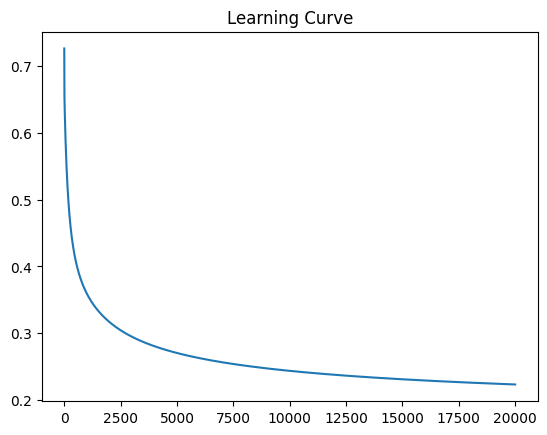

In [18]:
w,b=getParameters(X_train_normalised)
prediction=Regression(X_train_normalised,w,b)
alpha=0.6
e=0.00002 
p=[]
old_cost=10
new_cost=0
converged=False
i=0

while i<20000:
    i=i+1
    w,b=Gradient_Descent(X_train_normalised,y_train_normalised,prediction,alpha,w,b)
    prediction=Regression(X_train_normalised,w,b)
    prediction=Sigmoid(prediction)
    new_cost,C=Cost(y_train_normalised,prediction)
    p.append(new_cost)
    if abs(old_cost-new_cost)<e:
        converged=True
    old_cost=new_cost

print(i)
print(len(p))
z=range(1,i+1)
plt.plot(z,p)
plt.title("Learning Curve")

In [19]:
X_test_normalised,max1,min1=min_max_normalization(X_test)
y_test_normalised,max2,max2=min_max_normalization(y_test)

In [20]:
prediction=Regression(X_test_normalised,w,b)
prediction=Sigmoid(prediction)
prediction=Decision_Boundary(prediction,0.5)
accuracy=Accuracy(y_test,prediction)
print(accuracy,"%")

91.416153567548 %


In [21]:
X_normalised, X_max, X_min=min_max_normalization(X)
y_normalised, y_max, y_min=min_max_normalization(y)

In [22]:
prediction=Regression(X_normalised,w,b)
prediction=Decision_Boundary(prediction, 0.5)
accuracy=Accuracy(y_normalised,prediction)
print(accuracy,"%")
Confusion_Matrix(y,prediction)

86.91588785046729 %
1286 75 
 527 2713


In [23]:
prediction=Regression(X_train_normalised,w,b)
prediction=Decision_Boundary(prediction, 0.5)
accuracy=Accuracy(y_train_normalised,prediction)
print(accuracy,"%")

90.05434782608695 %


In [24]:
with open(r"C:\Users\yashr\OneDrive\Desktop\Mini-Projects\IDA Mini-Project\spam_email.txt",'r') as email:
    content=email.read()

In [25]:
lines=content.split()

In [26]:
l=["make","address","all","d3","our","over","remove","internet","order","mail","recieve","will","people","report","addresses","free",
   "business","email","you","credit","your","font","000","money","hp","hpl","george","650","lab","labs","telnet","857","data",
   "415","85","technology","1999","parts","pm","direct","cs","meeting","original","project","re","edu","table","conference",";",
   "(","[","!","$","#"]
v=[0]*len(l)
for word in lines:
    if word in l:
        i=l.index(word)
        v[i]=v[i]+1

In [27]:
v_final=[]
for num in v:
    a=num/56
    x=a*100
    v_final.append(x)
v_final.append(4)
v_final.append(13)
v_final.append(56)

In [28]:
sp_df=pd.DataFrame([v_final],columns=email_df.columns[:-1])

In [29]:
X=sp_df.loc[0]
X=X.values

In [30]:
X,max,min=min_max_normalization(X)

In [31]:
prediction=np.dot(X,w)+b

In [32]:
prediction=Sigmoid(prediction)
print("This model predicts that there is a",prediction*100,"% chance that this email is spam")

This model predicts that there is a 99.99934025123811 % chance that this email is spam


In [33]:
if prediction>0.5:
    prediction=1
else:
    prediction=0

In [34]:
if prediction==1:
    print("It's a spam email")
    print(content)
else:
    print("It's not a spam email.")

It's a spam email
CONGRATULIONS user ! ! ! It's our pleasure to inform you that you have won a chance to win and recieve money upto 20 000 $ . Just forward this mail to 15 different email addresses on the internet. Win money , free business or other exciting rewards for limited time ! 
This email is valid upto 4 months from the date of recieving . No later responses will be entertained.
In order to submit your documents, our representative will soon come in contact with you. Just Reply yes to this email, with your mobile number to show us that you are genuinely ready to take part in this wondeful oppoutunity.
# free #money # 20000 # people
